In [1]:
import epigraph_elijahsandler as ees
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
ees.area_plot

<function epigraph_elijahsandler.importation_plots.area_plot(client, table_name: str, reference_table_name: str, source_geo_level: str, target_geo_level: str, output_geo_level: str = None, source_values=None, target_values=None, domestic: bool = True, cutoff: float = 0.05, value: str = 'importations', title: str = 'Area Plot', xlabel: str = 'Date', ylabel: str = 'Exportations', legendlabel: str = 'Source', display: str = 'source') -> plotly.graph_objs._figure.Figure>

In [3]:
ees.sankey

<function epigraph_elijahsandler.importation_plots.sankey(client, table_name, reference_table_name, source_geo_level, target_geo_level, source_values, target_values, date_range, cutoff=0.05, source_output_level=None, target_output_level=None, domestic=True, title='Sankey Diagram')>

In [4]:
ees.importation_plots.relative_risk

<function epigraph_elijahsandler.importation_plots.relative_risk(client, table_name, reference_table_name, source_geo_level, target_geo_level, source_values, target_values, date_range, cutoff=0.05, n=20, target_output_level=None, domestic=True, title='Relative Risk of Importation', xlabel='Relative Risk of Importation', ylabel=None)>

In [5]:
credentials = service_account.Credentials.from_service_account_file('C:\\Users\\elija\\Documents\\24f-coop\\credentials.json')
project = 'net-data-viz-handbook'
# Initialize a GCS client
client = bigquery.Client(credentials=credentials, project=project)

In [6]:
table_name = 'net-data-viz-handbook.importation_data.sir_importations_1'
reference_table_name = 'reference.gleam-geo-map'
source_geo_level = 'continent_label'  # Geographic level for source filtering
target_geo_level = 'continent_label'        # Geographic level for target filtering
output_geo_level = 'region_label'      # Geographic level for output

source_values = ['Asia']
target_values = ['North America', 'South America']      
domestic = False
cutoff = 0.05

In [7]:
fig = ees.area_plot(client=client, table_name=table_name, reference_table_name=reference_table_name,
                               source_geo_level=source_geo_level, target_geo_level=target_geo_level, output_geo_level=output_geo_level,
                               source_values=source_values, target_values=target_values, domestic=domestic, cutoff=cutoff, 
                               title="Example Area Plot", value='rolling_importations', display='target')

BadRequest: 400 SELECT list expression references g_target.region_label which is neither grouped nor aggregated at [4:9]; reason: invalidQuery, location: query, message: SELECT list expression references g_target.region_label which is neither grouped nor aggregated at [4:9]

Location: US
Job ID: 2d1158d2-2d5e-45ae-9437-3f60fd0522dc


In [ ]:
fig.update_layout(width=1000, height=500)
fig.show()

In [8]:
table_name = "net-data-viz-handbook.importation_data.sir_importations_1"
reference_table_name = 'reference.gleam-geo-map'

source_geo_level = "continent_label"  # This could also be "region_id" or other levels
source_values = ['North America']  
source_output_level = "country_name"

target_geo_level = "continent_label"  # Could be "country_id", "region_label", etc.
target_values = ["North America", "South America"]  # Regions to filter on
target_output_level = 'country_name'

date_range = ["2009-10-01", "2009-10-31"]  # The date range for the data
cutoff = 0.1  # Threshold for categorizing regions
domestic = False

In [9]:
sfig = ees.sankey(client, table_name, reference_table_name, 
                                                source_geo_level, target_geo_level, 
                                                source_values, target_values, 
                                                source_output_level=source_output_level, target_output_level=target_output_level,
                                                date_range=date_range, cutoff=cutoff, domestic=domestic, title='Sankey!')

C:\Users\elija\venv\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


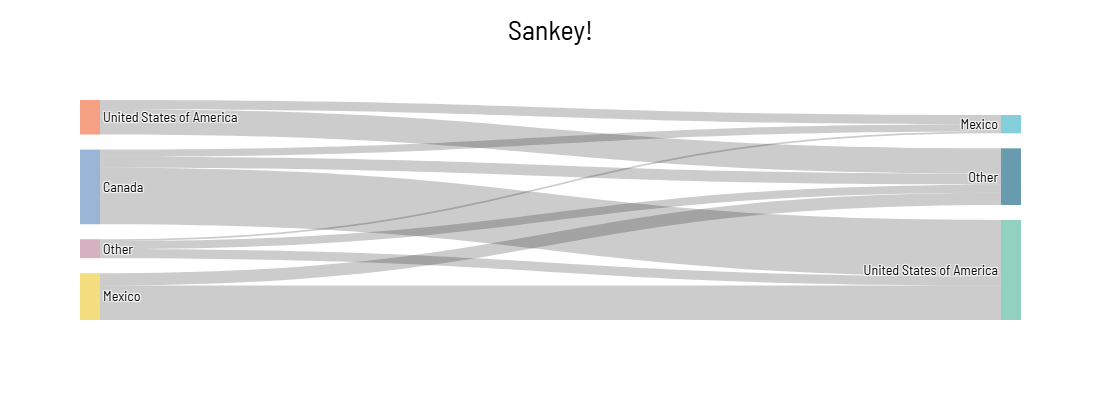

In [32]:
sfig.update_layout(width=800, height=400)
sfig

C:\Users\elija\venv\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



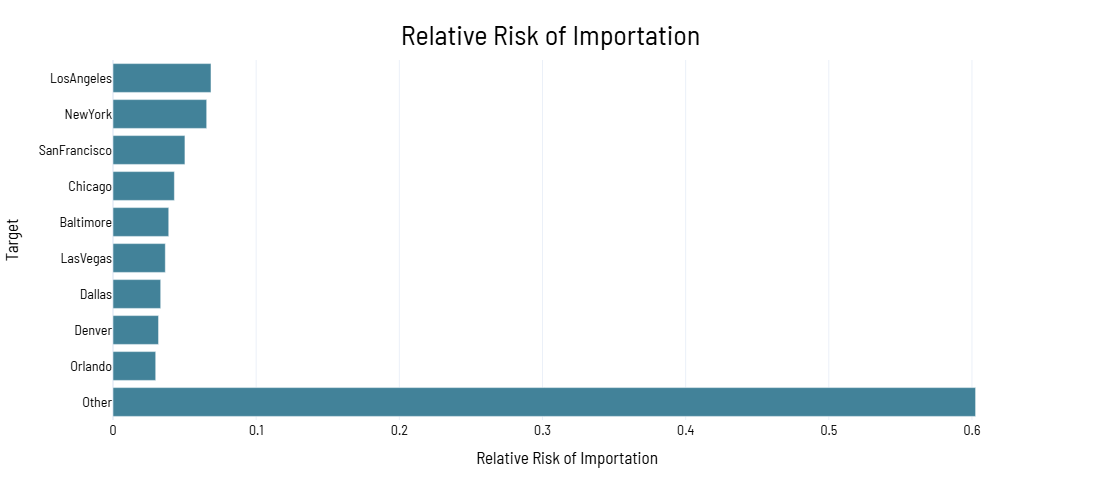

In [29]:
fig = ees.relative_risk(client, table_name, reference_table_name, source_geo_level='country_name', 
                                target_geo_level='country_name', source_values='United States of America', target_values='United States of America', 
                                date_range=date_range, cutoff=0.02, n=10, 
                                target_output_level='basin_label', domestic=True, 
                                title='Relative Risk of Importation', xlabel='Relative Risk of Importation')
fig.update_layout(width=800, height=500)
fig